In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [3]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
x = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
y = le.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [10]:
model = GaussianNB()

In [11]:
model.fit(x_train,y_train)

GaussianNB()

In [12]:
y_pred = model.predict(x_test)

In [13]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score

In [16]:
matrix = confusion_matrix(y_test,y_pred,labels=model.classes_)
print(matrix)

tp,fn,fp,tn = confusion_matrix(y_test,y_pred,labels=[1,0]).reshape(-1)

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


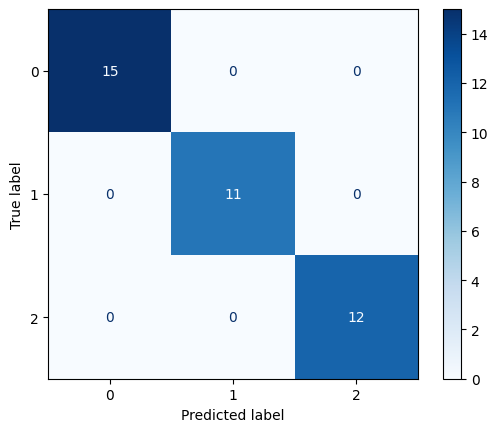

In [18]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels = model.classes_)
conf_matrix.plot(cmap=plt.cm.Blues)
plt.show()

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [21]:
print("Accuracy Score : ",accuracy_score(y_test,y_pred))
print("Error rate : ",(fn+fp)/(fn+fp+tn+tp))
print("Sensitivity (Recall or True Positive rate) : ",tp/(tp+fn))
print("Specificity (True Negative Rate) : ",tn/(tn+fp))
print("Precision (Positive predictive value) : ",tp/(tp+fp))
print("False Positive rate : ",fp/(fp+tn))

Accuracy Score :  1.0
Error rate :  0.0
Sensitivity (Recall or True Positive rate) :  1.0
Specificity (True Negative Rate) :  1.0
Precision (Positive predictive value) :  1.0
False Positive rate :  0.0
